# Neuromodulator Imaging Analysis

Here's some instructions from Alex on Friday 15/09:

- Simulate a train of APs of neurons: assuming a spike every second, then scale it to faster, then addd jitter/Poisson distribution — try drawing from an exp distribution or flip a coin each time
- Simulate relationship btn APs and DA release
- Simulate the signal delta F/ F

In this notebook, we will simulate the dynamics of neuromodulator concentration. For this we will start with:
- Simulation of a firing neuron, 
- Translate that to release of a neuromodulator. 
- Followed by a simulation of the signal $\Delta F/F$ produced by the changes in neuromodulator concentration.

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp

### Simulation of firing neuron

In [13]:
# define the number of timesteps 70 seconds - 70000 milliseconds
# each timestep / bin is 1 ms wide
n_timesteps = 70000 

# Start with an array of the timesteps that we're recording from
firing_neuron = np.zeros(n_timesteps)


# Then populate the array with signals - firing & not firing -- with a specific probability that you choose
for i in range(n_timesteps):
    x = np.random.rand()

    # firing with probability of 1/1000 at each time bin
    if x < 0.001:
        firing_neuron[i]=1

# done!

Now let's visualize our firing neuron to see if we simulated it correctly

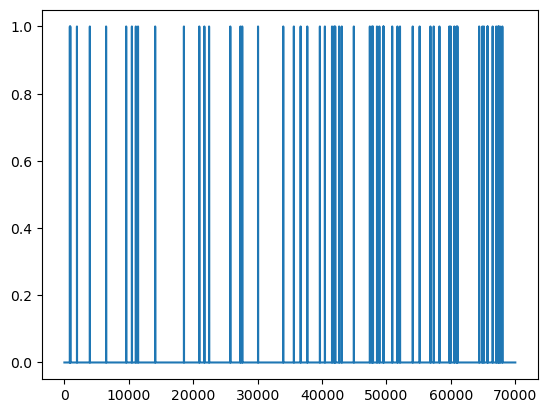

In [14]:
plt.plot(firing_neuron)

Ok, look's like the neuron is firing as we expect it to over 70,000 timesteps


### Neuromodulator concentration

Now let's simulate a simple case of neuromodulator release caused by our firing neuron. Here, we assume that the neuromodulator release occurs instantaneously, and that we are dealing with one compartment and there's no uptake. 

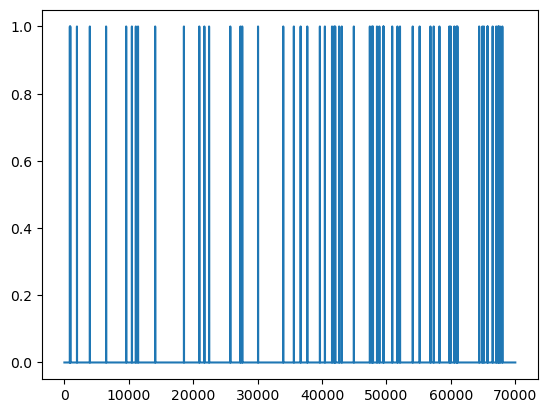

In [92]:
# timesteps where the neuron fired
firing_timesteps = np.nonzero(firing_neuron)

# generate visual representation of a train of spikes
spike_train = sp.signal.unit_impulse(n_timesteps,idx=firing_timesteps)

plt.plot(spike_train)

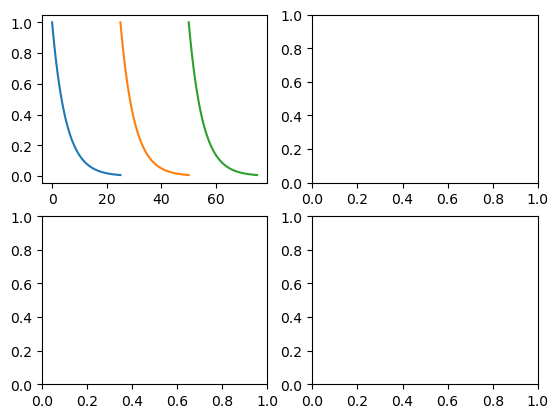

In [79]:
# try to plot a series of exponentials

fig, ax = plt.subplots(2,2)

z = np.arange(100)
z1 = np.linspace(0,25)
z2 = np.linspace(25,50)
z3 = np.linspace(50,75)
tau_prime = 5
ax[0,0].plot(z1,np.exp(-z1/tau_prime))
ax[0,0].plot(z2,np.exp(-(z1)/tau_prime))
ax[0,0].plot(z3,np.exp(-(z1)/tau_prime))

In [94]:
firing_timesteps

(array([  850,   916,  1950,  3952,  6473,  9591, 10478, 11089, 11430,
        14091, 18556, 20942, 21729, 22460, 25754, 27327, 27606, 30060,
        33962, 33974, 35622, 36673, 37704, 39663, 40439, 41545, 41887,
        42041, 42652, 43060, 44934, 47420, 47753, 47898, 48526, 48898,
        49519, 49545, 50887, 51701, 52099, 54077, 55147, 56825, 57335,
        58221, 59755, 59961, 60534, 60896, 61015, 64389, 64888, 65122,
        65685, 65708, 66482, 67034, 67332, 67401, 67619, 67986]),)

In [93]:
# each time the neuron fires, a spike appears


# this is followed by an explonential decay 

# this repeats for all the instances of firing


# rough work

# get an array of the times of firing
firing_neuron

# make a function with a spike starting at each of these timesteps
# then make sure that each of these spikes is followed by an exponential decay

tau = 5


/var/folders/zy/yd8f_r21629f1sr6zfh12jv40000gp/T/ipykernel_35198/1210939421.py:13: RuntimeWarning: overflow encountered in exp
  transients = (100/ (np.exp(dt_sequence / tau) -1)) * (1 - np.exp(-n*dt_sequence/tau) )


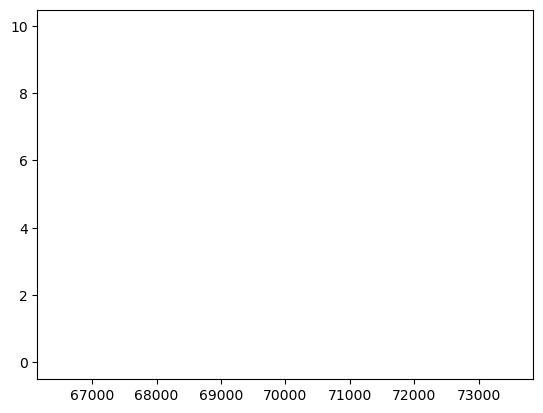

In [99]:
# Rough work

# attempt at simulation of the ca transients in eq. 7 of 
# calcium dynamics paper

# array of the intervals between the firing timesteps
dt_sequence = np.diff(firing_timesteps)

# plug these into the equation from the paper
A = 1
n = n_timesteps

transients = (100/ (np.exp(dt_sequence / tau) -1)) * (1 - np.exp(-n*dt_sequence/tau) )


#plot it
plt.plot(n_timesteps,transients)

In [100]:
dt_sequence

array([[  66, 1034, 2002, 2521, 3118,  887,  611,  341, 2661, 4465, 2386,
         787,  731, 3294, 1573,  279, 2454, 3902,   12, 1648, 1051, 1031,
        1959,  776, 1106,  342,  154,  611,  408, 1874, 2486,  333,  145,
         628,  372,  621,   26, 1342,  814,  398, 1978, 1070, 1678,  510,
         886, 1534,  206,  573,  362,  119, 3374,  499,  234,  563,   23,
         774,  552,  298,   69,  218,  367]])